In [18]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

## MD simulation at 300 K

In [2]:
#compute phi and psi angles
traj = md.load_trr('adp.trr', top='adp.gro')
phi_angles = md.compute_phi(traj, periodic=True, opt=True)
psi_angles = md.compute_psi(traj, periodic=True, opt=True)

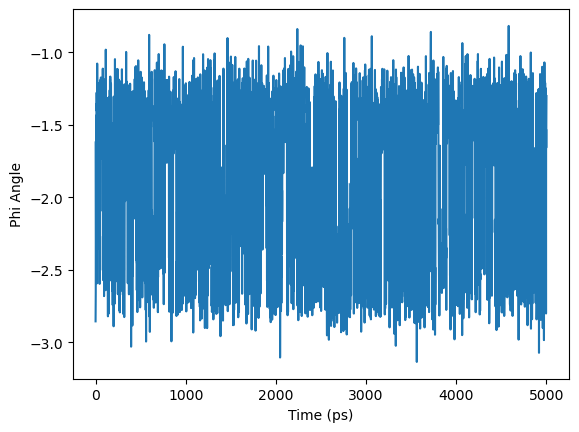

In [57]:
plt.plot(traj.time, phi_angles[1])

plt.xlabel('Time (ps)')
plt.ylabel('Phi Angle')

plt.show()

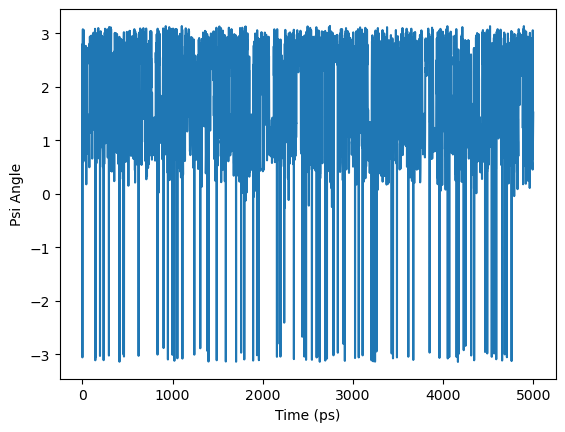

In [58]:
plt.plot(traj.time, psi_angles[1])
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle')
plt.show()

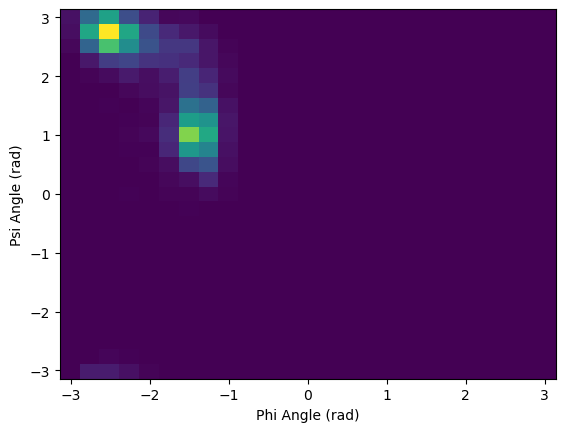

In [60]:
# plot histograms 
x = phi_angles[1].flatten()
y = psi_angles[1].flatten()
plt.hist2d(x, y, range=[[-np.pi, np.pi], [-np.pi, np.pi]], bins=25)
plt.xlabel('Phi Angle (rad)')
plt.ylabel('Psi Angle (rad)')
plt.show()

In [51]:
#save histogram data as array

hist_data, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[-np.pi, np.pi], [-np.pi, np.pi]], normed=None, weights=None, density=None)
hist_data= hist_data.T

/state/partition1/job-25646780/ipykernel_73484/3602881255.py:3: RuntimeWarning: divide by zero encountered in log
  energy_data = -np.log(hist_data)


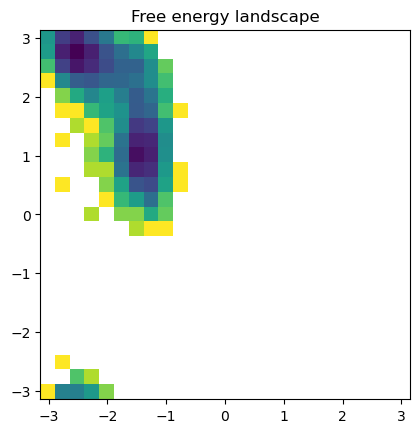

In [65]:
#free energy plots

energy_data = -np.log(hist_data)

plt.imshow(energy_data, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title('Free energy landscape')
plt.show()

## Parallel tempering

In [58]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300


/state/partition1/job-25648175/ipykernel_2313973/2828608436.py:7: RuntimeWarning: divide by zero encountered in log
  energy_data = -np.log(hist_data)


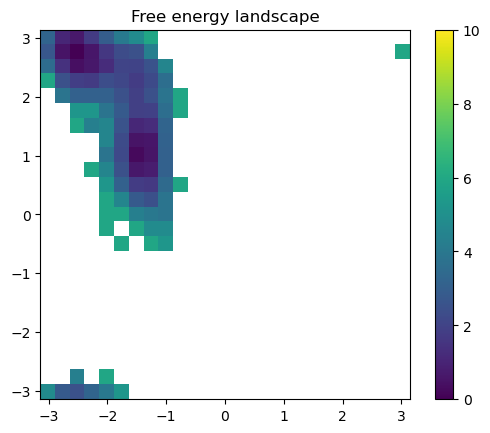

In [60]:
#free energy surface

traj = md.load_trr('adp_exchange4temps.trr', top='adp.gro')
phi_angles = md.compute_phi(traj, periodic=True, opt=True)
psi_angles = md.compute_psi(traj, periodic=True, opt=True)

x = phi_angles[1].flatten()
y = psi_angles[1].flatten()

hist_data, xedges, yedges = np.histogram2d(x, y, bins=25, range=[[-np.pi, np.pi], [-np.pi, np.pi]], normed=None, weights=None, density=None)
hist_data= hist_data.T

energy_data = -np.log(hist_data)

energy_data = energy_data - np.min(energy_data)

plt.imshow(energy_data, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], origin='lower')
plt.title('Free energy landscape')

plt.colorbar(mappable=None, cax=None, ax=None)
plt.clim(vmax=10)

plt.show()

note: the free energy landscape is very similar to before the parallel tempering, even though there was a good rate of exchange with higher temp reservoirs (60-70% according to the log files). i tried also plotting the free energies for the higher temperatures and they appear similar to at 300 K. not sure where i went wrong

In [61]:
#potential energy histograms 

cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T300


In [37]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data300 = lines[24:]

data300 = np.loadtxt(data300,unpack=True)

In [46]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T350

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T350


In [47]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data350 = lines[24:]

data350 = np.loadtxt(data350,unpack=True)

In [48]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T400

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T400


In [49]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data400 = lines[24:]

data400 = np.loadtxt(data400,unpack=True)

In [50]:
cd /scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T450

/scratch/work/courses/CHEM-GA-2671-2022fa/ns3539/comp-lab-class/Week5/T450


In [51]:
f = open('energy.xvg')

lines=f.readlines()

#for num, line in enumerate(lines):
    #print(num, line)
    
data450 = lines[24:]

data450 = np.loadtxt(data450,unpack=True)

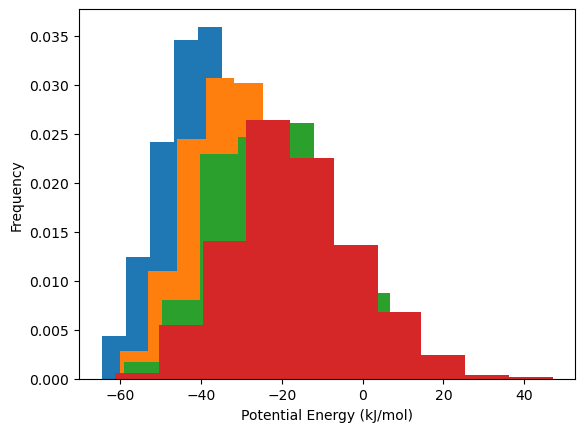

In [57]:
plt.hist(data300[1], bins=10, density=True)
plt.hist(data350[1], bins=10, density=True)
plt.hist(data400[1], bins=10, density=True)
plt.hist(data450[1], bins=10, density=True)
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Frequency')
plt.show()